<a href="https://colab.research.google.com/github/MrocznyKapelusz/ML_basics/blob/master/ML_basics_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras

Dołączamy dataset

In [ ]:
mnist =tf.keras.datasets.fashion_mnist
print(type(mnist))

<class 'module'>


2 zestawy po 2 listy


In [ ]:
(training_images, training_labels),(test_images,test_labels)=mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


zobacz przykładowy training img i label

9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  82 187
   26   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   1   0   0   1   0   0 179 240 237
  255 240 139  83  64  43  60  54   0   1]
 [  0   0   0   0   0   0   0   0   0   1   0   0   1   0  58 239 222 234
  238 246 252 254 255 248 255 187   0   0]
 [  0   0   0   0   0   0   0   0   0   0   2   3   0   0 194 

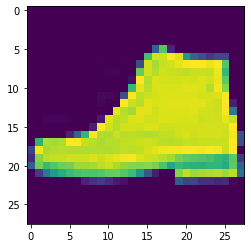

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(training_images[42])
print(training_labels[42])
print(training_images[42])

NOrmalizacja listy - zamiast 0-255 będzie 0-1

In [ ]:
training_images = training_images / 255.0
test_images=test_images / 255.0


#Projekt modelu NN

In [ ]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128,activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10,activation=tf.nn.softmax)])

**Sequential** - sekwencja warstw w 

**Flatten** - zmienia obrazek w set (1 wymiarowy)

**Dense** - dodaje warstwy neuronow. Kazda warstwa potrzebuje funkcji aktywacyjnej, ktora mowi co warstwa ma robic.

**Relu** - jesli x>0 return x, else return 0 - do kolejnej warstwy przekazuje tylko wartosci wieksze niz 0

**Softmax** - zeruje nienajwieksze wartosci w zbiorze, a najwieksza = 1

# Budowa modelu

a potem jego szkolenie

In [ ]:
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(training_images, training_labels,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2819 - accuracy: 0.8956
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2678 - accuracy: 0.9010
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2569 - accuracy: 0.9052
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2487 - accuracy: 0.9076
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2390 - accuracy: 0.9116


# Sprawdzenie na nowych danych

In [ ]:
model.evaluate(test_images,test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 0.3316 - accuracy: 0.8837


[0.3315736651420593, 0.8837000131607056]

Ex.1:

Sprawdzamy jaka kategorie przydziela dla pierwszego obrazka - dla accuracy 88% z evaluate - przewiduje 9 - czyli tak, jak powinno byc (label dla 0-wego elementu to tez 9)

In [ ]:
classifications = model.predict(test_images)
print(classifications[0])

[2.3448553e-08 7.7741598e-12 8.9954592e-11 3.8422741e-09 3.5825801e-10
 2.6919423e-03 7.0597483e-09 1.1624555e-02 1.4363070e-08 9.8568350e-01]


In [ ]:
print(test_labels[0])

9


EX 2:

Nowe wartosci dla gestosci warstw

In [ ]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(1024, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

2.2.0
Epoch 1/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.4702
Epoch 2/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3566
Epoch 3/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3231
Epoch 4/5
1875/1875 [==============================] - 12s 7ms/step - loss: 0.2977
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.3283
[2.1426645e-07 7.2437647e-09 1.1575138e-10 2.0932751e-09 2.7369234e-09
 4.1565071e-03 8.5387299e-08 6.7626396e-03 2.6615115e-08 9.8908055e-01]
9


EX 3:

Co gdyby nie bylo Flatten()?

Pierwsza warstwa NN powinna byc tego samego ksztaltu co dane (28x28 zmieniamy na 784x1)


EX 4:
Co gdyby ostatnich warstw nie bylo 10, tylko na przyklad 5? 
Blad! Liczba neuronow w ostatniej warstwie powinna byc rowna liczbie klas, ktore przydzielamy (0-9 u nas, czyli jest ich 10)

In [ ]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0


model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(64, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

# This version has the 'flatten' removed. Replace the above with this one to see the error.
# model = tf.keras.models.Sequential([tf.keras.layers.Dense(64, activation=tf.nn.relu),
#                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])



# This is the version with the wrong number of neurons in the final layer
# model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
#                                     tf.keras.layers.Dense(64, activation=tf.nn.relu),
#                                     tf.keras.layers.Dense(5, activation=tf.nn.softmax)])


model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

2.2.0
Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5172
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3938
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3540
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3322
Epoch 5/5
313/313 [==============================] - 0s 1ms/step - loss: 0.3597
[5.08060521e-06 1.51445789e-08 1.29366720e-06 2.01265775e-05
 6.29883289e-07 4.29475531e-02 7.55200244e-06 1.10716775e-01
 3.37817683e-03 8.42922866e-01]
9


EX 5:
Co gdy dodasz dodatkowa warstwe pomiedzy?

Bez wielkiej roznicy - ze wzgledu na dosc latwe dane

In [ ]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(256, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

2.2.0
Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4697
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3575
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3204
Epoch 4/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2958
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.3388
[5.2169858e-06 1.0393775e-05 5.5649944e-06 3.5218989e-06 2.1743340e-06
 2.5578854e-03 2.5303945e-05 4.5238622e-02 2.0924467e-06 9.5214921e-01]
9


EX 6:

Wiecej epok

Zjawisko "overfittingu" (przetrenowania?) - gdy NN trenuje za duzo, loss wcale nie spada, a nawet moze zaczac rosnac


In [ ]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=15)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[34])
print(test_labels[34])

2.2.0
Epoch 1/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5001 - accuracy: 0.8254
Epoch 2/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3749 - accuracy: 0.8647
Epoch 3/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3370 - accuracy: 0.8777
Epoch 4/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3142 - accuracy: 0.8845
Epoch 5/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2951 - accuracy: 0.8924
Epoch 6/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2818 - accuracy: 0.8957
Epoch 7/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2714 - accuracy: 0.9001
Epoch 8/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2591 - accuracy: 0.9030
Epoch 9/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2498 - accuracy: 0.9076
Epoch 10/15
1875/1875 [==============================] - 3s 2ms/step - loss:

EX 7:

Bez normalizacji danych - pierwsza epoka ma ogromny loss, ale koncowy wynik jest ok

Normalizacja zapewnia, ze kazdy z feature'ow pojedynczej danej jest tak samo wazny

In [ ]:
import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
# To experiment with removing normalization, comment out the following 2 lines
# training_images=training_images/255.0
# test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5)
model.evaluate(test_images, test_labels)
classifications = model.predict(test_images)
print(classifications[0])
print(test_labels[0])

2.2.0
Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 3.8385 - accuracy: 0.7571
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5467 - accuracy: 0.8146
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5190 - accuracy: 0.8223
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5146 - accuracy: 0.8248
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.5074 - accuracy: 0.8346
[8.87161304e-21 9.48696292e-22 3.94841133e-28 6.22786910e-24
 1.23225689e-26 1.19569175e-01 1.95335503e-26 1.61739124e-03
 1.93946537e-16 8.78813386e-01]
9


EX 8:

Zatrzymanie treningu po osiagnieciu wystarczajacej (okreslonej) celnosci.

In [ ]:
import tensorflow as tf
print(tf.__version__)

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.9):
      print("\nReached 90% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images/255.0
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=10, callbacks=[callbacks])

2.2.0
Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4753 - accuracy: 0.8299
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3589 - accuracy: 0.8677
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3231 - accuracy: 0.8802
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2976 - accuracy: 0.8898
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2787 - accuracy: 0.8972
Epoch 6/10
1867/1875 [============================>.] - ETA: 0s - loss: 0.2653 - accuracy: 0.9010
Reached 90% accuracy so cancelling training!
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2652 - accuracy: 0.9010
